In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [3]:
train=pd.read_csv('E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/train.csv')
test=pd.read_csv('E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/test.csv')

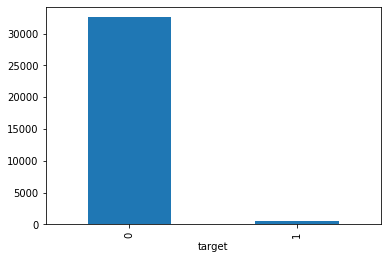

In [4]:
train.groupby('target').size().plot(kind='bar')

In [5]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
def mapping(inpdata):
    if(inpdata==0):
        return('zero')
    else:
        return('one')

In [7]:
train['target']=train['target'].apply(mapping)

In [8]:
train['image']=train['image_name']+'.jpg'

In [9]:
test['image']=test['image_name']+'.jpg'

In [27]:
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,image
0,ISIC_0052060,IP_3579794,male,70.0,NaN,ISIC_0052060.jpg
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,ISIC_0052349.jpg
2,ISIC_0058510,IP_7960270,female,55.0,torso,ISIC_0058510.jpg
3,ISIC_0073313,IP_6375035,female,50.0,torso,ISIC_0073313.jpg
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,ISIC_0073502.jpg


In [13]:
image_names=list(train['image'].values)
image_labels=list(train['target'].values)

In [11]:
folders = np.unique(list(train['target'].values))

In [12]:
folders

array(['one', 'zero'], dtype='<U4')

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#rom keras.applications.resnet152V2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


Using TensorFlow backend.


In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/SIM-ISIC/train/X_train'
test_path = 'E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/SIM-ISIC/train/X_test'

In [15]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [17]:
folders = glob('E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/SIM-ISIC/train/X_train/*')

In [18]:
x = Flatten()(resnet152V2.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 23188 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 0 images belonging to 0 classes.


In [ ]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=1,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 725 steps
640/725 [=========================>....] - ETA: 46:45 - loss: 1.2133 - accuracy: 0.9667

In [28]:
test_images=list(test['image'].values)

In [31]:
Test_path='E:/I neuron DLNLPCV/DL DATASETS/SIIM-ISIC Melanoma Classification/SIM-ISIC/test/'

In [34]:

from keras.models import load_model
from keras.preprocessing import image
#from tensorflow.keras.applications.ResNet152V2 import preprocess_input
import numpy as np
pred=[]
for j in test_images:
    img = image.load_img(Test_path+j, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)
    classes = np.argmax(model.predict(img_data), axis=1)
    pred.append(classes)


In [46]:
sample_df=pd.DataFrame(test, columns=['image_name'])
sample_df['target']=pred

In [44]:
sample_df['target'].value_counts()

[1]    10969
[0]       13
Name: target, dtype: int64

In [48]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 2 columns):
image_name    10982 non-null object
target        10982 non-null object
dtypes: object(2)
memory usage: 171.7+ KB


In [37]:
sample_df.head()

,image_name,target
0,ISIC_0052060,[1]
1,ISIC_0052349,[1]
2,ISIC_0058510,[1]
3,ISIC_0073313,[1]
4,ISIC_0073502,[1]


In [ ]:
sample_df.to_csv('sample_df.csv', index=False)